In [212]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
import sys
import astropy.units as u


In [213]:
# set up the plotting
# set font size
plt.rcParams.update({'font.size': 18})
# set the figure size
plt.rcParams.update({'figure.figsize': (10, 7)})
# set the font to latex
plt.rcParams.update({'text.usetex': True})


In [214]:
data = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/speedystar_catalogs/stock_long_corrected.csv')

In [215]:
data

col0,r0,phi0,theta0,v0,phiv0,thetav0,m,tage,tflight,sep,P,q,mem,met,stage,stagebefore,Rad,T_eff,Lum,vx,vy,vz,x,y,z,ra,dec,dist,parallax,pmra,pmdec,vlos,Lz,b,l,pmb,pml,Vesc,GCdist,GCv,thetaf,phif,Av,Bessell_V,Bessell_I,Gaia_GRVS,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,parallax_error,pmra_error,pmdec_error,e_vlos,bp_rp,M_g,implied_parallax,implied_parallax_error,VGCR,VR,implied_distance,implied_distance_error,A_G,A_bp,A_rp,G_corr,phot_bp_mean_mag_corr,phot_rp_mean_mag_corr,bp_rp_corr,implied_M_g,implied_M_g_corr,M_g_corr,implied_M_g_corr_error,VGCR_corrected,VR_corrected,D_corrected,D_corrected_0,D_corrected_1,D_corrected_2,D_corrected_3,D_corrected_4,D_corrected_5,D_corrected_6,D_corrected_7,D_corrected_8,D_corrected_9
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4,3.0,5.955043618252717,2.746694001945447,703.6194401741218,5.955043618252717,2.746694001945447,2.357530153587783,589.5708700879152,12.755775452144935,149.05669483141236,101.11745014592623,0.8434510642602284,1.0,0.0,1.0,1.0,3.272016092321977,8725.503846159934,55.90987953728178,104.58614537822528,-35.60633768319497,-221.173839777827,1.8504240957987972,-0.6299766089844832,-4.332216111560711,306.2805894358118,-45.895207926100156,7.560615292217079,0.1322643675613813,6.003802710364159,-8.24999358984492,59.737049543718115,-1.6710369617057912e-13,-35.00397510760364,354.16153346864587,-6.623684548388323,-7.761111017174026,610.6057203836739,4.752792473845938,247.232563571939,2.7177361643940046,-0.32814168892686807,0.23899508263770514,15.015227761775664,14.866172388263927,14.869789302668535,15.018458902691052,15.079547641171011,14.901163215860539,0.022278877711602144,0.012921749072729243,0.011139438855801072,--,0.1783844253104725,0.625673200885366,0.1269393516479825,0.00022063894947812242,260.7039066501444,81.82412958588546,7877.777749906236,13.69271691084034,0.087506846,0.11336326,0.06638224,14.930952057097599,14.96618438263038,14.834780979081803,0.13140340354857827,0.536440281655004,0.44893343606155156,0.5381663552919136,0.5402113383404341,--,--,--,2.705881025862588e+20,2.705881002613928e+20,2.7065370237622243e+20,-1.5841437815330085e+21,5.557618287560216e+23,--,--,--,--,--
9,3.0,3.1201941401902276,0.6297882276990416,575.0815019308575,3.1201941401902276,0.6297882276990416,0.8382664913273884,11451.128421066824,49.94193630932929,74.9500634095746,66.3571845819192,0.5305398186741117,1.0,0.0,1.0,1.0,0.8865960994266391,5354.516784022607,0.5821412940975388,-16.048080818234247,0.3434574966742858,-70.48028770499,-1.1883430054589499,0.025432655684383836,-1.315051279572526,274.75042333232165,-32.776463847369904,9.284976717637859,0.10770086241577616,-0.8593548868387639,-5.4797329043825735,15.444629266180426,-1.162406590222753e-14,-8.12309817837279,0.15857201655746977,-1.7334944261217533,-5.268867107786222,693.7594540743174,1.772615521342321,72.28505942432894,2.406652024838927,3.1201941401902284,0.7353870967741937,21.009069560464827,19.90730699651756,19.717827911809792,20.72601051098539,21.261261626394425,20.03433483200468,0.8536188633709569,0.495098940755155,0.42680943168547847,--,1.226926794389744,5.887106415632825,0.10228918538391091,0.008503668587832422,128.17246620092934,94.59016549798487,9776.204554243035,812.7311138917026,0.5082788,0.6584644,0.38557762,20.21773172384931,20.602797254236375,19.648757212928906,0.9540400413074686,5.775159110808872,

In [216]:
data['D_corrected_pc'] = data['D_corrected']*u.meter.to(u.kpc)
data['VR_corrected_kms'] = data['VR_corrected']/1000

#data.write('/Users/mncavieres/Documents/2024-2/HVS/Data/speedystar_catalogs/stock_long_corrected.csv', format='csv', overwrite=True)

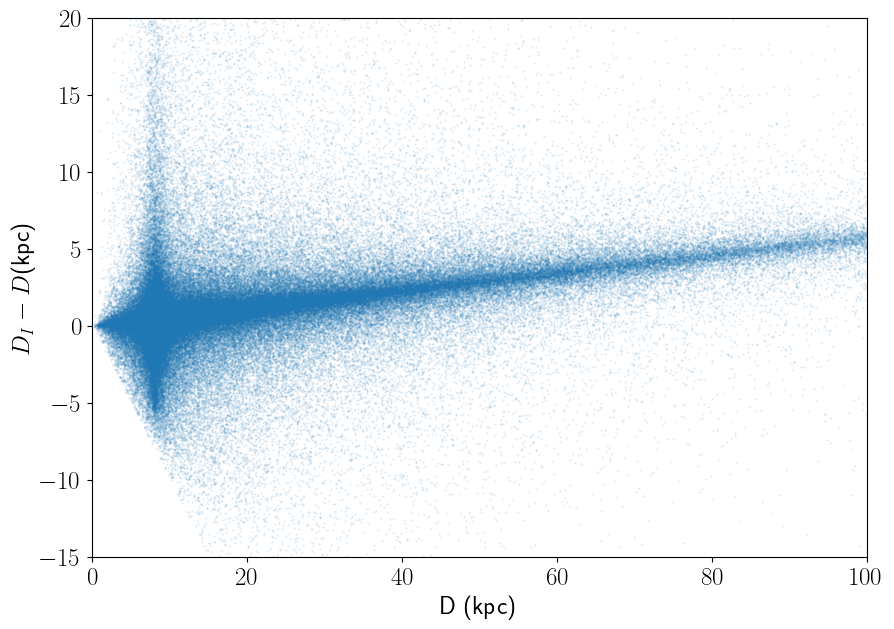

In [217]:
plt.scatter(data['dist'], data['implied_distance']/1000 - data['dist'], s = 0.5, alpha= 0.1)
plt.xlim(0, 100)
#plt.ylim(-100, 100)
plt.ylim(-15, 20)
plt.xlabel('D (kpc)')
plt.ylabel('$D_I - D$(kpc)')

plt.show()

In [218]:
from astropy.coordinates import SkyCoord

In [219]:
speedy_coords = SkyCoord(-data['x'], data['y'], data['z'], unit = 'kpc', representation_type = 'cartesian', frame= 'galactocentric')

In [220]:
dist_speedystar = speedy_coords.transform_to('icrs').distance


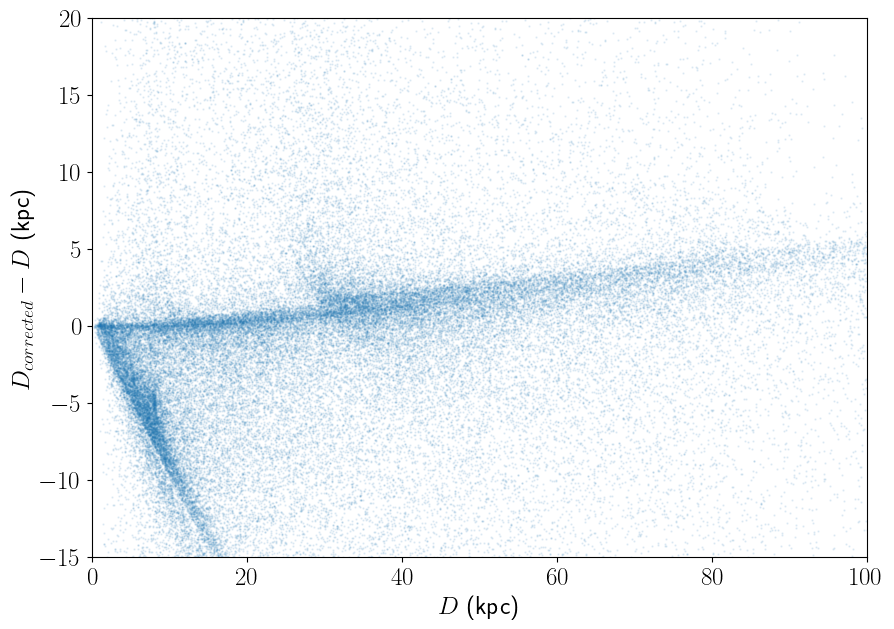

In [221]:
plt.scatter(data['dist'], data['D_corrected']*u.meter.to(u.kpc) - data['dist'], s = 0.5, alpha=0.1)
plt.xlim(0, 100)
#plt.ylim(-100, 100)
plt.ylim(-15, 20)
plt.xlabel('$D$ (kpc)')
plt.ylabel('$D_{corrected} - D$ (kpc)')
x_bias = np.linspace(0, 100, 100)
#plt.plot(x_bias, x_bias*0.056, 'r--', alpha = 0.3) 
# This bias might be different because of the reference frame for ICRS in speedystar
plt.show()

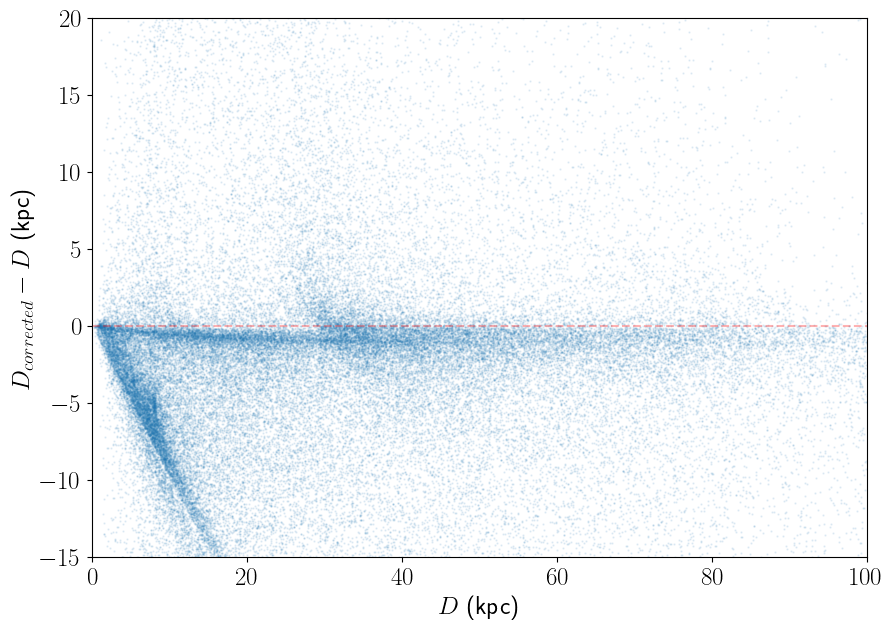

In [222]:
plt.scatter(data['dist'], data['D_corrected']*u.meter.to(u.kpc)*0.945 - data['dist'], s = 0.5, alpha=0.1)
plt.xlim(0, 100)
#plt.ylim(-100, 100)
plt.ylim(-15, 20)
plt.xlabel('$D$ (kpc)')
plt.ylabel('$D_{corrected} - D$ (kpc)')
x_bias = np.linspace(0, 100, 100)
plt.plot(x_bias, [0]*len(x_bias), 'r--', alpha = 0.3)
#plt.plot(x_bias, x_bias*0.056, 'r--', alpha = 0.3) 
# This bias might be different because of the reference frame for ICRS in speedystar
plt.show()

In [128]:
# what is the bias in the distance?
# I can fit a line to the data and see what is the slope, and just correct it that way
# I can also use the mean of the residuals
# I can also use the median of the residuals
# I can also use the mode of the residuals


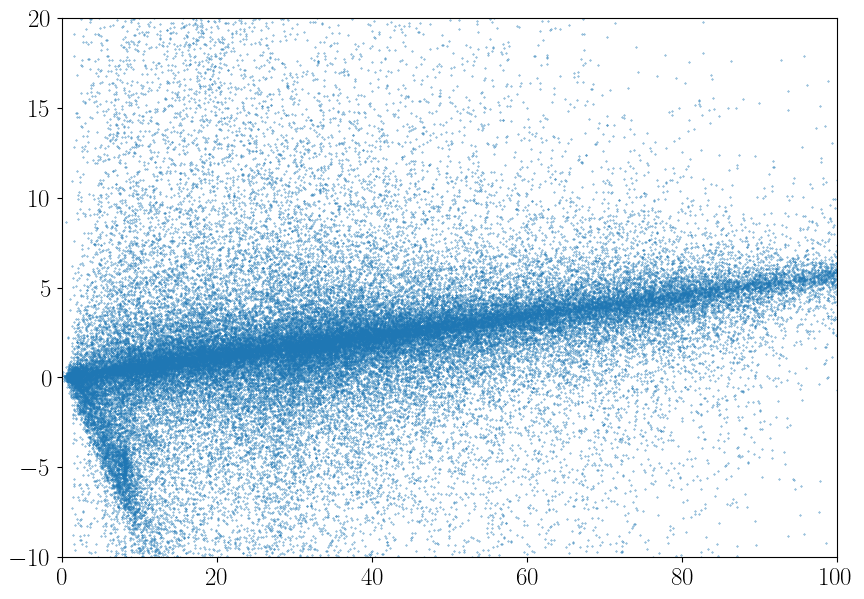

In [192]:
plt.scatter(dist_speedystar
            , data['D_corrected']*u.meter.to(u.kpc) -dist_speedystar.value, s = 0.1)
plt.xlim(0, 100)
#plt.ylim(-100, 100)
plt.ylim(-10, 20)
# This bias might be different because of the reference frame for ICRS in speedystar
plt.show()

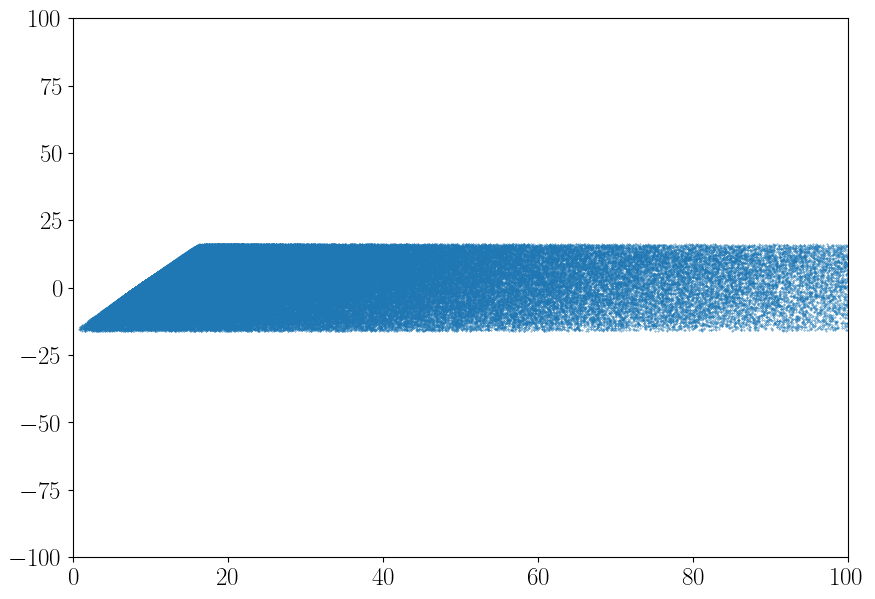

In [147]:
plt.scatter(dist_speedystar
            ,dist_speedystar.value - data['dist'], s = 0.1)
plt.xlim(0, 100)
#plt.ylim(-100, 100)
plt.ylim(-100, 100)
# This bias might be different because of the reference frame for ICRS in speedystar
plt.show()

Iteration 0: 0.3455583798174901
Iteration 1: 0.3455583772334133
Iteration 2: 0.33448939563661795
Iteration 3: 0.2686033514854841
Iteration 4: 0.10546301556650665


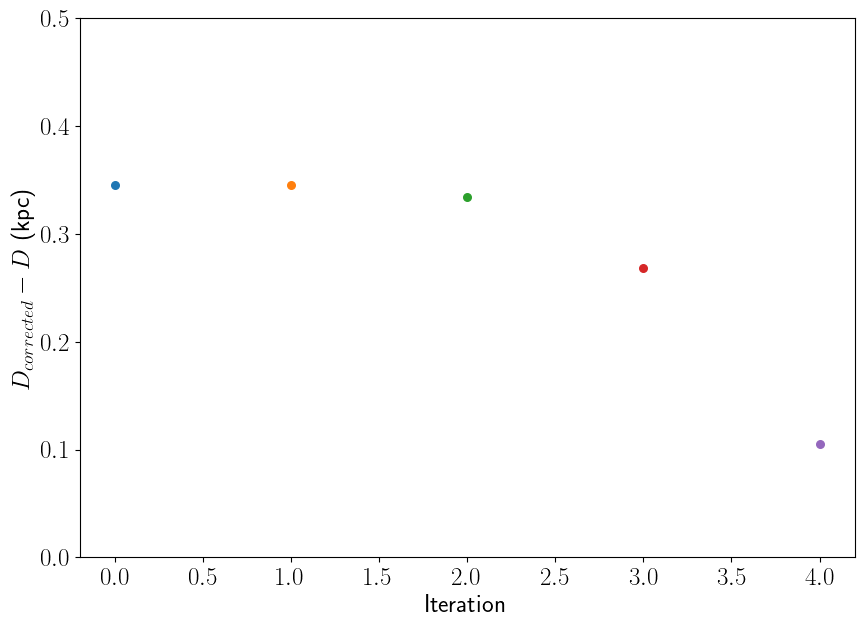

In [142]:
# plot distance error as a function of iteration
fig, ax = plt.subplots(1,1, figsize = (10, 7))
for i in range(5):
    diff = (data[f'D_corrected_{i}']*u.meter.to(u.kpc) - data['dist'])
    diff = diff[(data['dist'] < 15) & (data['dist'] > 5)]
    diff = diff[(diff < 10) & (diff > -10)]
    vals = np.mean(diff)
    ax.scatter([i], vals, s = 30)
    print(f'Iteration {i}: {vals}')


#ax.set_xlim(0, 10)
#plt.ylim(-100, 100)
ax.set_ylim(0, 0.5)
ax.set_xlabel('Iteration')
ax.set_ylabel('$D_{corrected} - D$ (kpc)')
plt.show()


# Custom galactocentric

In [148]:
from astropy.coordinates import ICRS, Galactocentric, CartesianRepresentation, CartesianDifferential

In [182]:
custom_galactocentric = Galactocentric(
    galcen_distance=-8.122 * u.kpc,  # Sun-Galactic center distance
    galcen_v_sun=[-11.1, 12.24, 7.25] * u.km / u.s,  # Solar motion
    z_sun=-0.0208 * u.kpc  # Solar height above the Galactic plane
)


In [183]:
speedy_coords = SkyCoord(data['x'], data['y'], data['z'], unit = 'kpc', representation_type = 'cartesian', frame= custom_galactocentric)
dist_speedystar = speedy_coords.transform_to('icrs').distance


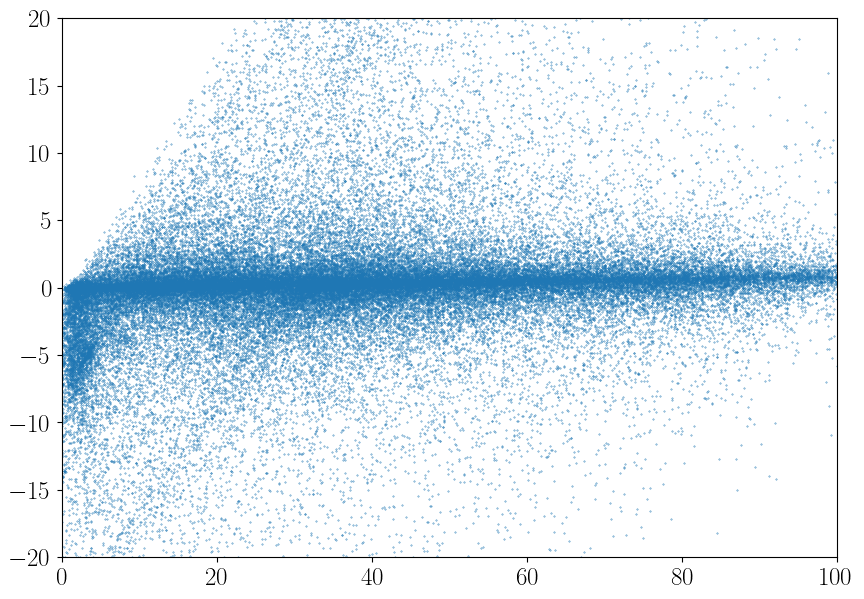

In [197]:
plt.scatter(data['D_corrected']*u.meter.to(u.kpc)
            , data['D_corrected']*u.meter.to(u.kpc)*0.954 -dist_speedystar.value, s = 0.1)
plt.xlim(0, 100)
#plt.ylim(-100, 100)
plt.ylim(-20, 20)
# This bias might be different because of the reference frame for ICRS in speedystar
plt.show()